In [1]:
import json
from pathlib import Path

In [2]:
ckpt_map: dict[int, Path] = {
    int(path.name.removeprefix('checkpoint_')): path
    for path in Path("openevolve_output/checkpoints").glob("checkpoint_*")
}
len(ckpt_map)

45

In [3]:
balancedness_scores: list[float] = []
speed_scores: list[float] = []
combined_scores: list[float] = []

for step, path in sorted(ckpt_map.items()):
    with open(path / "best_program_info.json", "r") as f:
        info = json.load(f)
    balancedness_scores.append(info["metrics"]["balancedness_score"])
    speed_scores.append(info["metrics"]["speed_score"])
    combined_scores.append(info["metrics"]["combined_score"])


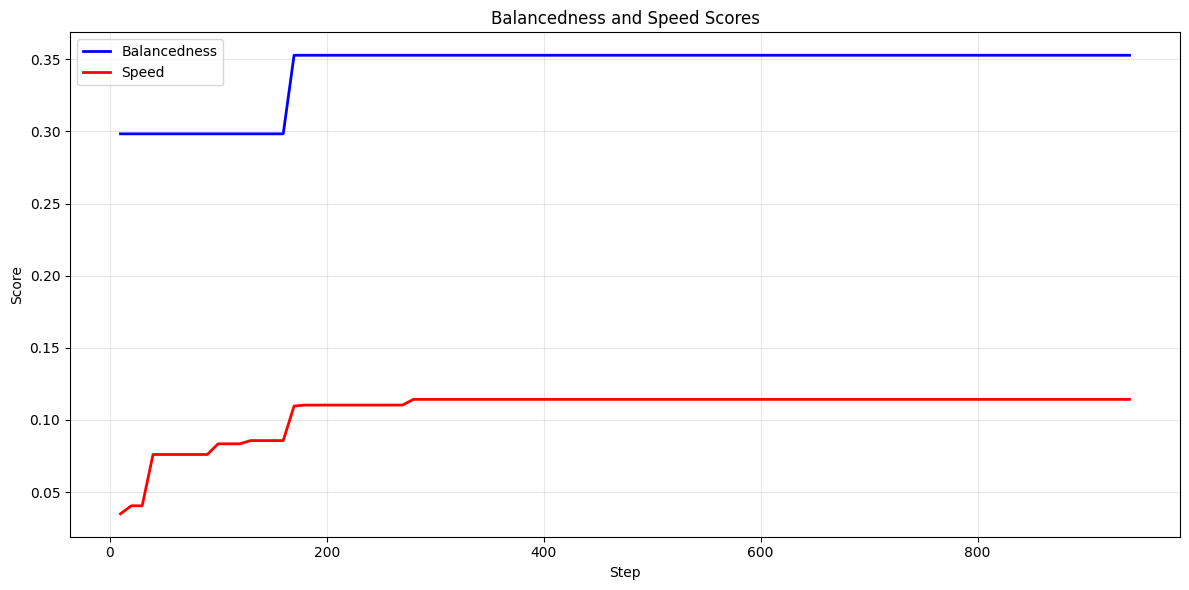

Balancedness score range: 0.2983 - 0.3528
Speed score range: 0.0350 - 0.1143
Total steps: 45


In [4]:
# Plot the balancedness scores and speed scores in the same plot
import matplotlib.pyplot as plt
import numpy as np

# 创建图形和子图
fig, ax = plt.subplots(figsize=(12, 6))

# 获取步数列表
steps = sorted(ckpt_map.keys())

# 绘制平衡性分数和速度分数
ax.plot(steps, balancedness_scores, 'b-', linewidth=2, label='Balancedness')
ax.plot(steps, speed_scores, 'r-', linewidth=2, label='Speed')

ax.set_xlabel('Step')
ax.set_ylabel('Score')
ax.set_title('Balancedness and Speed Scores')
ax.grid(True, alpha=0.3)
ax.legend()

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 打印一些统计信息
print(f"Balancedness score range: {min(balancedness_scores):.4f} - {max(balancedness_scores):.4f}")
print(f"Speed score range: {min(speed_scores):.4f} - {max(speed_scores):.4f}")
print(f"Total steps: {len(steps)}")
